In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin

from scipy.io import loadmat #To Read .mat files
import matplotlib.image as mpimg 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from collections import Counter

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
print("Setup Complete")

Setup Complete


# Anomaly Detection

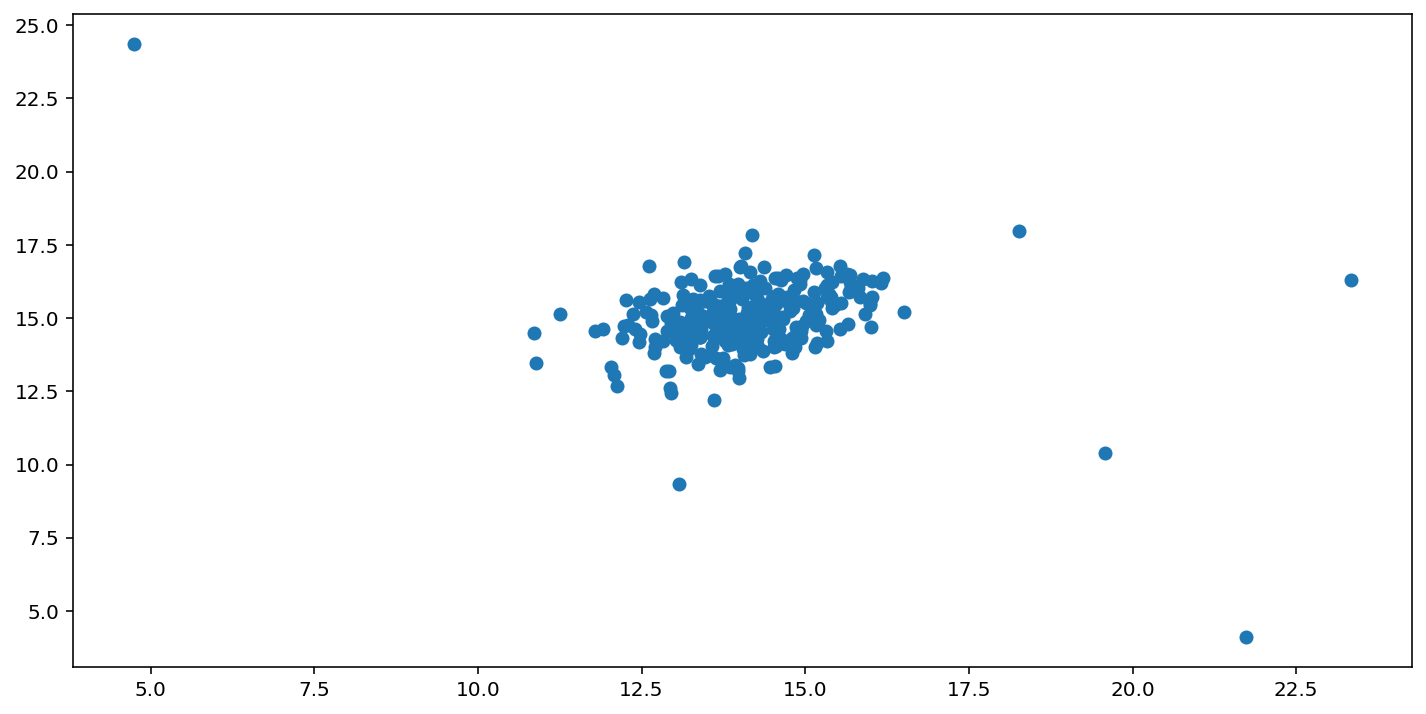

In [12]:
X = loadmat('data/ex8data1.mat')['X']
Xval = loadmat('data/ex8data1.mat')['Xval']
yval = loadmat('data/ex8data1.mat')['yval']
fig,ax = plt.subplots()
ax.scatter(x=X[:,0],y=X[:,1])

In [24]:
def getMuSigma(inputData):
    m = inputData.shape[0]
    mu = np.sum(inputData,axis=0)/m
    sigma = np.sum((inputData-mu)**2,axis=0)/m
    return mu,sigma

def estGaussian(inputData,grid):
    mu,sigma = getMuSigma(inputData)
    p=1
    if (len(mu)==len(sigma)):
        dim = len(mu)
        for i in range(0,dim):
            m = int(len(grid)/dim)
            X_grid = grid[i*m:(i+1)*m].reshape(70,70)
            p *= 1/sigma[i]/np.sqrt(2*np.pi)*np.exp(-0.5*((X_grid-mu[i])**2)/(sigma[i]**2))*X_grid
    return p

In [22]:
mu,sigma = getMuSigma(X)
xx = np.linspace(0,35,70)
yy = np.linspace(0,35,70)
XX, YY = np.meshgrid(xx,yy)
gridData = np.hstack((XX.flatten()[:,np.newaxis],XX.flatten()[:,np.newaxis]))
ax.contour(XX,YY,estGaussian(XX,gridData))
fig

70


ValueError: cannot reshape array of size 140 into shape (70,70)

In [272]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var
mu, sigma2 = estimateGaussian(X)